In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

Using TensorFlow backend.


In [2]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(133,activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 18,977,733
Trainable params: 18,977,733
Non-trainable params: 0
_________________________________________________________________


In [5]:
conv_base.trainable = False

In [6]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './dogImages'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


In [8]:
from keras.callbacks import ModelCheckpoint 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = ModelCheckpoint(filepath='dogsImages.pretrained.augmentation.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=334,
      epochs=150,
      validation_data=validation_generator,
      validation_steps=42, 
      callbacks=[checkpointer], 
      verbose=2)


Epoch 1/150
 - 669s - loss: 4.9142 - acc: 0.0105 - val_loss: 4.7858 - val_acc: 0.0299

Epoch 00001: val_loss improved from inf to 4.78584, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 2/150
 - 595s - loss: 4.7465 - acc: 0.0338 - val_loss: 4.6305 - val_acc: 0.0587

Epoch 00002: val_loss improved from 4.78584 to 4.63053, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 3/150
 - 596s - loss: 4.6147 - acc: 0.0585 - val_loss: 4.4779 - val_acc: 0.0802

Epoch 00003: val_loss improved from 4.63053 to 4.47790, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 4/150
 - 639s - loss: 4.4714 - acc: 0.0864 - val_loss: 4.3269 - val_acc: 0.0934

Epoch 00004: val_loss improved from 4.47790 to 4.32689, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 5/150
 - 650s - loss: 4.3270 - acc: 0.1120 - val_loss: 4.1856 - val_acc: 0.1066

Epoch 00005: val_loss improved from 4.32689 t

 - 558s - loss: 2.4987 - acc: 0.4037 - val_loss: 2.7208 - val_acc: 0.3257

Epoch 00039: val_loss improved from 2.73238 to 2.72085, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 40/150
 - 569s - loss: 2.5007 - acc: 0.4061 - val_loss: 2.7081 - val_acc: 0.3210

Epoch 00040: val_loss improved from 2.72085 to 2.70806, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 41/150
 - 549s - loss: 2.4714 - acc: 0.4079 - val_loss: 2.7095 - val_acc: 0.3210

Epoch 00041: val_loss did not improve from 2.70806
Epoch 42/150
 - 561s - loss: 2.4551 - acc: 0.4105 - val_loss: 2.6851 - val_acc: 0.3246

Epoch 00042: val_loss improved from 2.70806 to 2.68513, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 43/150
 - 570s - loss: 2.4301 - acc: 0.4148 - val_loss: 2.6677 - val_acc: 0.3413

Epoch 00043: val_loss improved from 2.68513 to 2.66765, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf

 - 560s - loss: 1.9185 - acc: 0.5263 - val_loss: 2.4870 - val_acc: 0.3832

Epoch 00083: val_loss did not improve from 2.47356
Epoch 84/150
 - 554s - loss: 1.8720 - acc: 0.5403 - val_loss: 2.4614 - val_acc: 0.3880

Epoch 00084: val_loss improved from 2.47356 to 2.46141, saving model to dogsImages.pretrained.augmentation.model.weights.best.hdf5
Epoch 85/150
 - 530s - loss: 1.8933 - acc: 0.5343 - val_loss: 2.4813 - val_acc: 0.3665

Epoch 00085: val_loss did not improve from 2.46141
Epoch 86/150
 - 566s - loss: 1.8744 - acc: 0.5287 - val_loss: 2.4680 - val_acc: 0.3880

Epoch 00086: val_loss did not improve from 2.46141
Epoch 87/150
 - 550s - loss: 1.8748 - acc: 0.5355 - val_loss: 2.4918 - val_acc: 0.3844

Epoch 00087: val_loss did not improve from 2.46141
Epoch 88/150
 - 558s - loss: 1.8667 - acc: 0.5371 - val_loss: 2.4723 - val_acc: 0.3772

Epoch 00088: val_loss did not improve from 2.46141
Epoch 89/150
 - 537s - loss: 1.8468 - acc: 0.5386 - val_loss: 2.4736 - val_acc: 0.3832

Epoch 00089

 - 546s - loss: 1.5298 - acc: 0.6141 - val_loss: 2.4316 - val_acc: 0.4024

Epoch 00138: val_loss did not improve from 2.41600
Epoch 139/150
 - 559s - loss: 1.5172 - acc: 0.6078 - val_loss: 2.4597 - val_acc: 0.4012

Epoch 00139: val_loss did not improve from 2.41600
Epoch 140/150
 - 541s - loss: 1.5271 - acc: 0.6100 - val_loss: 2.4356 - val_acc: 0.4000

Epoch 00140: val_loss did not improve from 2.41600
Epoch 141/150
 - 516s - loss: 1.5329 - acc: 0.6082 - val_loss: 2.4541 - val_acc: 0.4108

Epoch 00141: val_loss did not improve from 2.41600
Epoch 142/150
 - 503s - loss: 1.5014 - acc: 0.6141 - val_loss: 2.4575 - val_acc: 0.4144

Epoch 00142: val_loss did not improve from 2.41600
Epoch 143/150
 - 506s - loss: 1.4733 - acc: 0.6243 - val_loss: 2.4484 - val_acc: 0.4060

Epoch 00143: val_loss did not improve from 2.41600
Epoch 144/150
 - 524s - loss: 1.4983 - acc: 0.6210 - val_loss: 2.4549 - val_acc: 0.4096

Epoch 00144: val_loss did not improve from 2.41600
Epoch 145/150
 - 529s - loss: 1.48

In [12]:
model.load_weights('dogsImages.pretrained.augmentation.model.weights.best.hdf5')

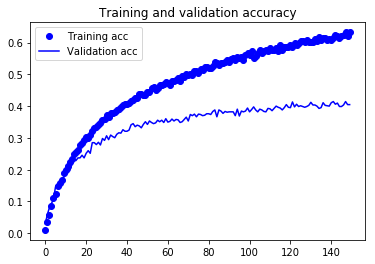

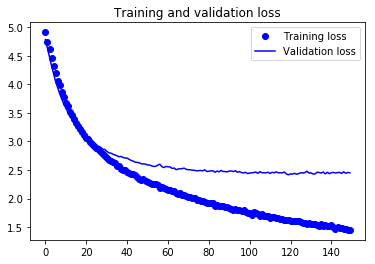

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [15]:
from keras.callbacks import ModelCheckpoint 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = ModelCheckpoint(filepath='dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)
history = model.fit_generator(
      train_generator,
      steps_per_epoch=334,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=42, 
      callbacks=[checkpointer], 
      verbose=2)

Epoch 1/15
 - 578s - loss: 1.6106 - acc: 0.5653 - val_loss: 2.5484 - val_acc: 0.4192

Epoch 00001: val_loss improved from inf to 2.54840, saving model to dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5
Epoch 2/15
 - 554s - loss: 1.4348 - acc: 0.6037 - val_loss: 2.6580 - val_acc: 0.4060

Epoch 00002: val_loss did not improve from 2.54840
Epoch 3/15
 - 549s - loss: 1.3002 - acc: 0.6386 - val_loss: 2.5072 - val_acc: 0.4515

Epoch 00003: val_loss improved from 2.54840 to 2.50723, saving model to dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5
Epoch 4/15
 - 549s - loss: 1.1874 - acc: 0.6683 - val_loss: 2.3719 - val_acc: 0.4611

Epoch 00004: val_loss improved from 2.50723 to 2.37186, saving model to dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5
Epoch 5/15
 - 535s - loss: 1.1160 - acc: 0.6844 - val_loss: 2.4399 - val_acc: 0.4467

Epoch 00005: val_loss did not improve from 2.37186
Epoch 6/15
 - 558s - loss: 1.0587 - acc: 0.698

In [16]:
model.load_weights('dogsImages.pretrained.finetuning.augmentation.model.weights.best.hdf5')

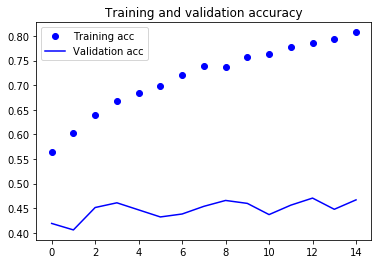

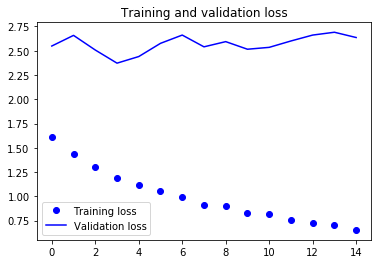

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

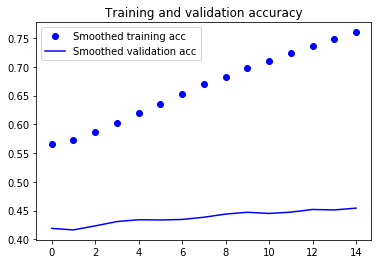

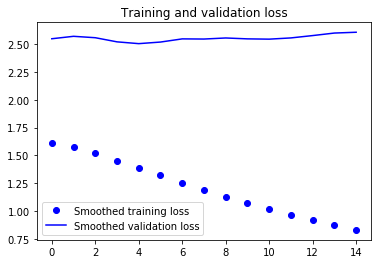

In [18]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test_acc:",test_acc)

Found 836 images belonging to 133 classes.
test_acc: 0.4387550214567338
